# Lab Session 5 

In [6]:
# Import some stuff
import numpy as np

### Data sets <a name='data'></a>

### SciKitLearn Digits <a name='sklearn1'></a>
1. SciKitLearn digits: just load it and use it as is. Use 70% of the data for training and 30% for testing. Run all of the four classifiers and compare and discuss the results.

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X1, y1 = load_digits(n_class=10, return_X_y=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,
                                                        test_size=0.3, 
                                                        random_state=42)

In [2]:
X1_train.shape

(1257, 64)

### SciKitLearn Digits (reduced) <a name='sklearn2'></a>
2. SciKitLearn digits summarised: reduce the data set to only contain three values for the attributes, e.g., 0 for 'dark', 1 for 'grey' and 2 for 'light', with dark, grey and light corresponding to the values suggested in lab 2 (decision trees). Split again into 70% training and 30% test data. Run all four classifiers on this set and compare the results. Why are they so different from those for the original data in particular for the NBC? Why do they decrease in accuracy for the GNB?

In [8]:
def reduce_data(X, new_values=[0, 1, 2]):
    max_value = np.max(X)
    split_value = round(max_value/len(new_values))
    thresholds = [new_value*split_value for new_value in new_values[1:]]
    X_new = np.zeros(X.shape)
    for i, row in enumerate(X):
        for j, elm in enumerate(row):
            if elm > thresholds[0] and elm <= thresholds[1]:
                X_new[i, j] = 1
            elif elm > thresholds[1]:
                X_new[i, j] = 2
    return X_new

In [9]:
X2, y2 = load_digits(n_class=10, return_X_y=True)
X2 = reduce_data(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                        test_size=0.3, 
                                                        random_state=42)
X2_train.shape

(1257, 64)

### MNIST.py <a name='mnist'></a>

3. MNIST_Light: load the MINST_Light data set (see above), inspect the contents (data and specifically the target) carefully and split the set into 70% training and 30% test data if you do not use the code in the handout (based on MNIST.py) as is. If you use the provided code to retrieve the data set, the three-dimensional (20x20-pixels per image) arrays will have been reshaped to be of the same two dimensions as given in the digits set (one flattened array per image) and the values for the attributes (pixels) will have been normalised from [0 ... 255] to [0.0 ... 1.0]. If you do not normalise them, you can observe a problem with the GNB. What is this problem and why is it solved by normalisation of the data?

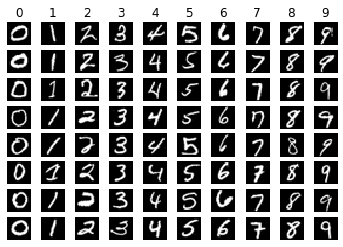

In [6]:
from Handout_NaiveBayes import MNIST
mnist = MNIST.MNISTData('Handout_NaiveBayes/MNIST_Light/*/*.png')
X3_train, X3_test, y3_train, y3_test = mnist.get_data()
mnist.visualize_random()

### Classifiers <a name='clf'></a>
You will implement an NCC, a discrete (count-based) NBC, and a Gaussian NBC and run and compare them on different versions of the data set(s) explained in point 2 as follows:

### Gaussian NB Classifier <a name='gnb1'></a>
1. Classifiers you should implement (and make sure that they work with the data sets indicated)

    a. Make use of the provided Gaussian NB Classifier (sklearn.naive_bayes GaussianNB) for all data sets as a comparison. It is already implemented in the handout for the MNIST_Light set.

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [8]:
gnb1 = GaussianNB()
gnb1.fit(X1_train, y1_train)
y1_pred = gnb1.predict(X1_test)

print("Classification report SKLearn GNB:\n%s\n"
      % (metrics.classification_report(y1_test, y1_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y1_test, y1_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.86      0.74      0.80        50
           2       0.86      0.66      0.75        47
           3       0.95      0.76      0.85        54
           4       0.98      0.85      0.91        60
           5       0.94      0.94      0.94        66
           6       0.89      0.96      0.93        53
           7       0.72      0.98      0.83        55
           8       0.57      0.91      0.70        43
           9       0.89      0.71      0.79        59

    accuracy                           0.85       540
   macro avg       0.87      0.85      0.85       540
weighted avg       0.88      0.85      0.85       540


Confusion matrix SKLearn GNB:
[[52  0  0  0  0  0  0  1  0  0]
 [ 0 37  2  0  0  0  0  2  6  3]
 [ 0  3 31  0  0  0  1  0 12  0]
 [ 0  0  2 41  0  0  1  0  8  2]
 [ 0  0  0  0 51  0  2  7  0  0]
 [ 0  0  0

In [40]:
gnb2 = GaussianNB()
gnb2.fit(X2_train, y2_train)
y2_pred = gnb2.predict(X2_test)

print("Classification report SKLearn GNB:\n%s\n"
      % (metrics.classification_report(y2_test, y2_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y2_test, y2_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.89      0.34      0.49        50
           2       0.78      0.68      0.73        47
           3       0.58      0.80      0.67        54
           4       0.96      0.72      0.82        60
           5       0.98      0.61      0.75        66
           6       0.87      1.00      0.93        53
           7       0.62      0.98      0.76        55
           8       0.41      0.91      0.57        43
           9       0.83      0.34      0.48        59

    accuracy                           0.73       540
   macro avg       0.79      0.73      0.72       540
weighted avg       0.80      0.73      0.72       540


Confusion matrix SKLearn GNB:
[[52  0  0  1  0  0  0  0  0  0]
 [ 0 17  6  0  0  0  2  3 19  3]
 [ 0  2 32  0  0  0  0  0 13  0]
 [ 0  0  2 43  0  0  1  0  8  0]
 [ 0  0  0  0 43  0  4 13  0  0]
 [ 0  0  0

In [42]:
gnb3 = GaussianNB()
gnb3.fit(X3_train, y3_train)
y3_pred = gnb3.predict(X3_test)

print("Classification report SKLearn GNB:\n%s\n"
      % (metrics.classification_report(y3_test, y3_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(y3_test, y3_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

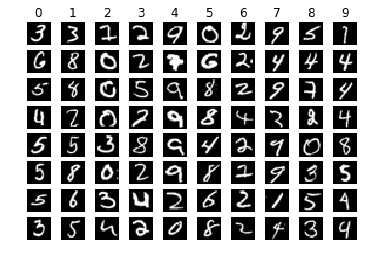

In [49]:
mnist.visualize_wrong_class(y3_pred, 8)

### Nearest Centroid Classifier (NCC)<a name='ncc'></a>

    b. Implement your own Nearest Centroid Classifier (NCC): The NCC fit method should simply compute the mean values over the attribute values of the examples for each class. Prediction is then done by finding the argmin over the distances from the class centroids for each sample. This classifier should be run on all three variants of data sets, see below.

In [9]:
from numpy import linalg as LA

class NCC_classifier:
    def __init__(self):
        self.mean = None
    

    def fit(self, X, y):
        classes = sorted(set(y))
        # The mean (i.e. the centroid) of each class
        self.mean = np.zeros([len(classes), len(X[0])])
        for i, ci in enumerate(classes):
            attributes = [xj for j, xj in enumerate(X) if y[j] == ci]
            self.mean[i] = np.mean(attributes, axis=0)
    
    
    def predict(self, X):
        # Picking the nearest centroid belonging to a certain class
        y_pred = [np.argmin(LA.norm(xi-self.mean, axis=1)) for xi in X]
        return np.asarray(y_pred)

In [ ]:
print(len(X[0]))

In [10]:
ncc1 = NCC_classifier()
ncc1.fit(X1_train, y1_train)
y1_pred = ncc1.predict(X1_test)

print("Classification report NCC:\n%s\n"
      % (metrics.classification_report(y1_test, y1_pred)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(y1_test, y1_pred))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.81      0.70      0.75        50
           2       0.86      0.91      0.89        47
           3       0.96      0.89      0.92        54
           4       0.96      0.92      0.94        60
           5       0.93      0.79      0.85        66
           6       0.98      0.98      0.98        53
           7       0.90      0.98      0.94        55
           8       0.78      0.88      0.83        43
           9       0.74      0.86      0.80        59

    accuracy                           0.89       540
   macro avg       0.89      0.89      0.89       540
weighted avg       0.89      0.89      0.89       540


Confusion matrix NCC:
[[52  0  0  0  0  1  0  0  0  0]
 [ 0 35  7  0  0  0  0  0  4  4]
 [ 0  1 43  1  0  0  0  0  2  0]
 [ 0  0  0 48  0  0  0  1  4  1]
 [ 0  3  0  0 55  0  0  2  0  0]
 [ 0  0  0  0  1 52  1  0 

In [11]:
ncc2 = NCC_classifier()
ncc2.fit(X2_train, y2_train)
y2_pred = ncc2.predict(X2_test)

print("Classification report NCC:\n%s\n"
      % (metrics.classification_report(y2_test, y2_pred)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(y2_test, y2_pred))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.80      0.66      0.73        50
           2       0.88      0.91      0.90        47
           3       0.92      0.87      0.90        54
           4       0.97      0.93      0.95        60
           5       0.93      0.80      0.86        66
           6       0.94      0.96      0.95        53
           7       0.89      1.00      0.94        55
           8       0.76      0.86      0.80        43
           9       0.74      0.85      0.79        59

    accuracy                           0.88       540
   macro avg       0.88      0.88      0.88       540
weighted avg       0.88      0.88      0.88       540


Confusion matrix NCC:
[[50  0  0  0  1  1  1  0  0  0]
 [ 0 33  6  0  0  1  0  0  6  4]
 [ 0  2 43  1  0  0  0  0  1  0]
 [ 0  0  0 47  0  0  0  2  3  2]
 [ 0  2  0  0 56  0  0  2  0  0]
 [ 0  1  0  0  1 53  2  0 

In [12]:
ncc3 = NCC_classifier()
ncc3.fit(X3_train, y3_train)
y3_pred = ncc3.predict(X3_test)

print("Classification report NCC:\n%s\n"
      % (metrics.classification_report(y3_test, y3_pred)))
print("Confusion matrix NCC:\n%s" % metrics.confusion_matrix(y3_test, y3_pred))

Classification report NCC:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       164
           1       0.71      0.97      0.82       152
           2       0.84      0.73      0.78       155
           3       0.74      0.76      0.75       154
           4       0.75      0.76      0.75       143
           5       0.72      0.69      0.70       141
           6       0.90      0.86      0.88       143
           7       0.95      0.80      0.87       158
           8       0.79      0.72      0.75       132
           9       0.76      0.80      0.78       158

    accuracy                           0.80      1500
   macro avg       0.81      0.80      0.80      1500
weighted avg       0.81      0.80      0.80      1500


Confusion matrix NCC:
[[150   0   2   0   0   6   3   1   2   0]
 [  0 148   0   0   0   2   0   0   2   0]
 [  0  15 113   8   2   3   3   1   8   2]
 [  1   5   8 117   1   7   1   2   8   4]
 [  1   4   2   0 1

### Naive Bayesian Classifier (NBC) <a name='nbc'></a>

    c. Implement a Naive Bayesian Classifier (NBC) based on discrete (statistical) values (i.e., counts of examples falling into the different classes and attribute value groups) both for the priors and for the conditional probabilities. Run this on the two SciKitLearn digits data sets. It should also work with the (non-normalised) MNIST_Light set, but it will probably take a (very long) while and not give anything interesting really...

In [13]:
class NBC_classifier:
    def __init__(self):
        self.class_counts = None
        self.unique_values = None
        self.pixel_size = None
        self.classes = None
        self.prob_of_class = None
        self.cpt = {}
        
    
    # Fit should calculate the probabilities
    def fit(self, X, y):
        self.unique_values = np.unique(X)
        self.pixel_size = len(X[0])
        classes, counts = np.unique(y, return_counts=True)
        self.classes = classes
        self.class_counts = dict(zip(classes, counts))
        # Will use this in the predict method
        self.prob_of_class = dict(zip(classes, counts/len(y)))
        #cnt = 0
        for i, ci in enumerate(classes):
            # 
            attributes = [xj for j, xj in enumerate(X) if y[j] == ci]
            attributes = np.asarray(attributes)
            # This is just a temporary dictonary that will be used to fill in 'cpt'
            temp = {}
            for pixel in range(self.pixel_size):
                # 'unique' is all the unique values that the pixel has. 'counts' just count the occurence of 
                # each unique value
                unique, counts = np.unique(attributes[:, pixel], axis=0, return_counts=True)
                # The probability, for each class, for each pixel that the value is what it is.
                temp[pixel] =  dict(zip(unique, counts/self.class_counts[ci]))
            # Filling in the dict cpt for each class
            self.cpt[ci] = temp
 
    
    def predict(self, X):
        # Fit should calculate the probability and return the class with the highest prob
        y_pred = [] 
        for x in X:
            probs = []
            for ci in self.classes:
                prob = self.prob_of_class[ci]
                for pi, xi in enumerate(x):
                    try:
                        prob = prob * self.cpt[ci][pi][xi]
                    except:
                        prob = 0
                probs.append(prob)    
            y_pred.append(np.argmax(probs))
        return np.asarray(y_pred)

In [14]:
nbc1 = NBC_classifier()
nbc1.fit(X1_train, y1_train)
y1_pred = nbc1.predict(X1_test)

print("Classification report NBC:\n%s\n"
      % (metrics.classification_report(y1_test, y1_pred)))
print("Confusion matrix NBC:\n%s" % metrics.confusion_matrix(y1_test, y1_pred))

Classification report NBC:
              precision    recall  f1-score   support

           0       0.24      0.98      0.38        53
           1       0.84      0.52      0.64        50
           2       0.93      0.57      0.71        47
           3       0.89      0.63      0.74        54
           4       0.97      0.52      0.67        60
           5       0.97      0.45      0.62        66
           6       1.00      0.66      0.80        53
           7       0.95      0.65      0.77        55
           8       0.64      0.65      0.64        43
           9       0.70      0.53      0.60        59

    accuracy                           0.61       540
   macro avg       0.81      0.62      0.66       540
weighted avg       0.82      0.61      0.66       540


Confusion matrix NBC:
[[52  0  0  0  1  0  0  0  0  0]
 [16 26  1  0  0  0  0  0  6  1]
 [19  0 27  1  0  0  0  0  0  0]
 [13  0  1 34  0  0  0  0  5  1]
 [27  0  0  0 31  0  0  2  0  0]
 [23  0  0  0  0 30  0  0 

In [15]:
nbc2 = NBC_classifier()
nbc2.fit(X2_train, y2_train)
y2_pred = nbc2.predict(X2_test)

print("Classification report NBC:\n%s\n"
      % (metrics.classification_report(y2_test, y2_pred)))
print("Confusion matrix NBC:\n%s" % metrics.confusion_matrix(y2_test, y2_pred))

Classification report NBC:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.85      0.70      0.77        50
           2       0.88      0.91      0.90        47
           3       0.94      0.81      0.87        54
           4       0.91      0.97      0.94        60
           5       0.93      0.80      0.86        66
           6       0.98      0.98      0.98        53
           7       0.90      0.95      0.92        55
           8       0.74      0.93      0.82        43
           9       0.78      0.86      0.82        59

    accuracy                           0.88       540
   macro avg       0.88      0.88      0.88       540
weighted avg       0.89      0.88      0.88       540


Confusion matrix NBC:
[[48  0  0  1  3  0  0  1  0  0]
 [ 1 35  5  0  0  0  0  0  6  3]
 [ 0  2 43  0  0  0  0  0  2  0]
 [ 0  0  1 44  0  0  0  2  5  2]
 [ 2  0  0  0 58  0  0  0  0  0]
 [ 1  1  0  0  1 53  1  0 

In [16]:
nbc3 = NBC_classifier()
nbc3.fit(X3_train, y3_train)
y3_pred = nbc3.predict(X3_test)

print("Classification report NBC:\n%s\n"
      % (metrics.classification_report(y3_test, y3_pred)))
print("Confusion matrix NBC:\n%s" % metrics.confusion_matrix(y3_test, y3_pred))

Classification report NBC:
              precision    recall  f1-score   support

           0       0.11      1.00      0.20       164
           1       0.00      0.00      0.00       152
           2       0.00      0.00      0.00       155
           3       0.00      0.00      0.00       154
           4       0.00      0.00      0.00       143
           5       0.00      0.00      0.00       141
           6       0.00      0.00      0.00       143
           7       0.00      0.00      0.00       158
           8       0.00      0.00      0.00       132
           9       0.00      0.00      0.00       158

    accuracy                           0.11      1500
   macro avg       0.01      0.10      0.02      1500
weighted avg       0.01      0.11      0.02      1500


Confusion matrix NBC:
[[164   0   0   0   0   0   0   0   0   0]
 [152   0   0   0   0   0   0   0   0   0]
 [155   0   0   0   0   0   0   0   0   0]
 [154   0   0   0   0   0   0   0   0   0]
 [143   0   0   0  

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


###  Gaussian Naive Bayesian Classifier (GNB) <a name='gnb2'></a>

    d. Implement your own Gaussian Naive Bayesian Classifier (GNB) (assume priors for the classes based on counts and Gaussian distributions for the conditional probabilities) and make sure it works for all three data sets. You will most likely encounter problems due to the edge pixels having value 0.0 in practically ALL images in ALL data sets. A workaround is to add an epsilon to the variance. Why is that still working?

In [202]:
from scipy.stats import norm
class GNB_classifier:
    def __init__(self, eps=5e-1):
        self.eps = eps
        self.mu = {}
        self.sig = {}
        self.prior = {}
        self.classes = None
        
    
    def fit(self, X, y):
        classes, count = np.unique(y, return_counts=True)
        self.classes = classes
        for ci in classes:
            attributes = [x for j, x in enumerate(X) if y[j] == ci]
            attributes = np.asarray(attributes)
            samples_len, dim = attributes.shape
            # The mean value for each class
            self.mu[ci] = np.mean(attributes, axis=0)
            self.sig[ci] = np.std(attributes, axis=0)
            self.prior[ci] = samples_len/len(y)
        return self.mu, self.sig, self.posterior
            
        
    def predict(self, X):
        y_pred = []
        for x in X:
            prob = [self.posterior(x, ci) for ci in self.classes]
            y_pred.append(np.argmax(prob))
        return np.asarray(y_pred)
    
    
    def posterior(self, x, ci):
        return self.prior[ci]*np.prod([norm.pdf(x[i], self.mu[ci][i], self.sig[ci][i] + self.eps) for i in range(len(x))])

In [203]:
gnbc1 = GNB_classifier()
gnbc1.fit(X1_train, y1_train)
y1_pred = gnbc1.predict(X1_test)

print("Classification report GNB:\n%s\n"
      % (metrics.classification_report(y1_test, y1_pred)))
print("Confusion matrix GNB:\n%s" % metrics.confusion_matrix(y1_test, y1_pred))

Classification report GNB:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.90      0.72      0.80        50
           2       0.88      0.91      0.90        47
           3       0.92      0.87      0.90        54
           4       0.95      1.00      0.98        60
           5       0.95      0.89      0.92        66
           6       0.98      0.96      0.97        53
           7       0.93      0.98      0.96        55
           8       0.72      0.95      0.82        43
           9       0.88      0.83      0.85        59

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.92      0.91      0.91       540


Confusion matrix GNB:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 36  4  0  0  0  0  0  7  3]
 [ 0  1 43  0  0  0  0  0  3  0]
 [ 0  0  2 47  0  0  0  0  4  1]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  1  0  1  1 59  1  0 

In [208]:
gnbc2 = GNB_classifier(eps=1e-1)
gnbc2.fit(X2_train, y2_train)
y2_pred = gnbc2.predict(X2_test)

print("Classification report GNB:\n%s\n"
      % (metrics.classification_report(y2_test, y2_pred)))
print("Confusion matrix GNB:\n%s" % metrics.confusion_matrix(y2_test, y2_pred))

Classification report GNB:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.85      0.70      0.77        50
           2       0.84      0.91      0.88        47
           3       0.80      0.89      0.84        54
           4       0.95      0.98      0.97        60
           5       0.98      0.89      0.94        66
           6       0.96      1.00      0.98        53
           7       0.92      0.98      0.95        55
           8       0.74      0.93      0.82        43
           9       0.90      0.73      0.80        59

    accuracy                           0.90       540
   macro avg       0.89      0.90      0.89       540
weighted avg       0.90      0.90      0.90       540


Confusion matrix GNB:
[[50  0  0  1  2  0  0  0  0  0]
 [ 0 35  6  0  0  0  0  0  6  3]
 [ 0  2 43  0  0  0  0  0  2  0]
 [ 0  0  2 48  0  0  0  0  4  0]
 [ 0  0  0  0 59  0  1  0  0  0]
 [ 0  1  0  1  1 59  1  1 

In [217]:
gnbc3 = GNB_classifier(eps=0.05)
gnbc3.fit(X3_train, y3_train)
y3_pred = gnbc3.predict(X3_test)

print("Classification report GNB:\n%s\n"
      % (metrics.classification_report(y3_test, y3_pred)))
print("Confusion matrix GNB:\n%s" % metrics.confusion_matrix(y3_test, y3_pred))

Classification report GNB:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       164
           1       0.68      0.99      0.81       152
           2       0.80      0.61      0.69       155
           3       0.77      0.75      0.76       154
           4       0.83      0.58      0.68       143
           5       0.96      0.55      0.70       141
           6       0.82      0.92      0.87       143
           7       0.95      0.77      0.85       158
           8       0.66      0.67      0.66       132
           9       0.58      0.89      0.70       158

    accuracy                           0.77      1500
   macro avg       0.80      0.76      0.76      1500
weighted avg       0.80      0.77      0.77      1500


Confusion matrix GNB:
[[153   0   5   0   0   0   3   0   2   1]
 [  0 150   0   0   0   0   1   0   1   0]
 [  1   8  94  11   1   2  18   1  18   1]
 [  0   8  13 116   0   0   1   2   6   8]
 [  1   2   1   0  